In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix as plot_cm

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

%matplotlib inline

In [2]:
df = pd.read_csv('..\\dados\\faces_treino.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,alvo
0,-0.388313,-0.238500,-0.697147,0.665464,0.625708,-0.182667,-0.682124,-1.332043,0.413116,-1.710804,...,0.033712,0.543509,1.053117,0.036854,-0.506603,2.039641,-0.333338,0.643939,-0.988801,Desconhacido
1,-0.724313,-1.555679,-0.491024,2.196854,-0.095217,-0.029841,-0.236149,-2.769077,0.008790,0.858134,...,-0.658543,0.333266,-0.412094,-0.779274,-0.223395,1.228065,0.307974,0.497019,-1.176557,Desconhacido
2,0.186094,0.698456,-0.473427,0.318079,-0.555410,0.414760,0.729408,-0.223099,-0.883670,-1.067199,...,0.401492,0.808003,-1.431435,1.517705,1.919249,-0.358578,0.814904,-1.477942,0.027399,Desconhacido
3,0.912068,-0.532578,0.124543,-0.211452,0.744448,0.542646,0.072237,-0.916575,0.630978,-1.349500,...,-0.422218,-1.293600,-0.740567,2.067734,1.893432,0.227753,-1.190224,-0.890599,0.413459,Desconhacido
4,-0.294852,-0.526991,-0.234587,0.698482,2.961263,-0.790051,-0.198669,-1.517867,0.617799,0.595339,...,0.634579,-0.158153,0.810129,2.179033,-0.070347,0.222828,-0.751379,-0.567592,0.274194,Desconhacido


In [3]:
X = np.array(df.drop('alvo', axis=1))
y = np.array(df.alvo)
nome_classes = df.alvo.unique()

In [4]:
treinoX, treinoY = shuffle(X, y, random_state=42)

In [5]:
le = LabelEncoder()
le.fit(treinoY)

treinoY = le.transform(treinoY)
treinoY

array([2, 2, 0, 2, 0, 0, 3, 0, 2, 1, 0, 3, 0, 0, 1, 0, 2, 3, 2, 3, 0, 0,
       3, 2, 0, 3, 1, 2, 2, 1, 3, 1, 2, 0, 2, 1, 1, 3, 1, 1, 3, 0, 0, 0,
       0, 3, 1, 1, 0, 1, 0, 3, 3, 0, 3, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0,
       3, 2, 3, 0, 3, 1, 0, 0, 3, 2, 2, 3, 1, 2, 0, 0, 2, 2, 2, 0, 2, 3,
       1, 0, 2, 3, 1, 2, 1, 3, 3, 3, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 3, 3,
       1, 3, 2, 3, 2, 0, 0, 2, 3, 2, 1, 1, 0, 3, 0, 1, 3, 3, 1, 2, 3, 1,
       2, 1, 1, 1, 2, 2, 2, 3, 0, 1, 2, 1, 1, 2, 0, 1, 1, 3, 0, 3, 2, 1,
       0, 1, 1, 0, 3, 3, 3, 2, 2, 1, 3, 0, 3, 1, 1, 2, 0, 0, 1, 0, 1, 3,
       0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 2, 3, 1, 1, 1, 3, 0, 3, 3, 3, 3,
       3, 3, 1, 2, 2, 2, 2, 1, 0, 0, 3, 1, 2, 1, 1, 3, 2, 1, 3, 2, 3, 2,
       3, 1, 2, 1, 1, 1, 1, 3, 0, 2, 1, 2, 2, 0, 1, 3, 2, 3, 3, 3, 3, 1,
       0, 3, 0, 0, 3, 1, 2, 2, 1, 2, 1, 2, 0, 3, 0, 0, 2, 1, 1, 0, 0, 0,
       1, 1, 3, 2, 2, 0, 0, 2, 2, 3, 1, 0, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3,
       2, 1, 0, 2, 0, 0, 0, 2, 2, 3, 0, 3, 2, 2, 2,

In [6]:
# validação
df_val = pd.read_csv('..\\dados\\faces_validacao.csv')
df_val.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,alvo
0,-0.868100,-2.596633,-0.189149,1.354571,-0.279782,-1.569395,-1.077242,0.879807,-0.046270,0.016018,...,-2.228687,1.208452,-0.768819,0.813632,-1.235054,-1.020071,-0.474822,0.056766,0.563398,Desconhecido
1,0.091845,0.568946,-0.570795,1.397774,1.583693,-0.782292,-0.943915,-1.174724,1.553781,-2.666841,...,-1.094370,0.499978,-0.337125,0.694377,-0.057151,1.678644,-1.608734,-0.049961,-0.801952,Desconhecido
2,-1.490249,0.683534,-0.865304,0.725782,-0.238300,-0.031432,-1.832989,-0.749937,-0.255921,-2.465865,...,-0.637263,0.721525,0.026797,1.728883,0.868392,0.640219,-0.351550,-0.387878,1.166220,Desconhecido
3,-0.911458,0.850990,-0.066679,0.664382,-0.795028,1.665198,-0.520423,-1.052025,0.703121,-2.655503,...,-0.328937,-1.112960,0.626143,1.934606,-1.686491,0.249525,-1.675047,1.036272,-1.084320,Desconhecido
4,0.950458,1.292446,-0.750623,-0.362144,0.557248,-0.016750,-0.773281,1.498607,-0.510444,1.009430,...,-1.501625,-1.141505,-0.931672,-0.150145,2.203952,0.708816,-0.645506,0.520323,0.040765,Desconhecido


In [7]:
valX = np.array(df_val.drop('alvo', axis=1))
valY = np.array(df_val.alvo)

In [8]:
le.fit(valY)

valY = le.transform(valY)
valY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [9]:
# matriz de confusão
def plot_confusion_matrix(nome_modelo, valY, yhat_val, nome_classes):
    cm = confusion_matrix(valY, yhat_val)
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

    print(f'MODELO: {nome_modelo}')
    print(f'Accurácia : {accuracy:.4f}')
    print(f'Sensitividade : {sensitivity:.4f}')
    print(f'Especificidade : {specificity:.4f}')
    print(classification_report(valY, yhat_val, target_names=nome_classes))

    fig, ax = plot_cm(conf_mat=cm, figsize=(5, 5), class_names=nome_classes)
    plt.tight_layout()
    plt.show()

In [10]:
treinoY = to_categorical(treinoY)
valY = to_categorical(valY)

In [11]:
modelo = Sequential()

# primeira camada densa
modelo.add(Dense(64, input_dim=128, activation='relu'))
modelo.add(Dropout(0.5))

# segunda camada densa
modelo.add(Dense(32, activation='relu'))
modelo.add(Dropout(0.5))

# terceira camada densa
modelo.add(Dense(16, activation='relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(4, activation='softmax'))
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 6

In [12]:
modelo.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [13]:
modelo.fit(
    treinoX, treinoY,
    epochs=100,
    batch_size=8,
    validation_data=(valX, valY))

Epoch 1/100
50/50 [==============================] - 3s 15ms/step - loss: 1.8921 - accuracy: 0.2675 - val_loss: 1.0951 - val_accuracy: 0.6048
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 1.4701 - accuracy: 0.3725 - val_loss: 0.9898 - val_accuracy: 0.7964
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 1.3185 - accuracy: 0.4225 - val_loss: 0.8578 - val_accuracy: 0.8563
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 1.1840 - accuracy: 0.4975 - val_loss: 0.7551 - val_accuracy: 0.8623
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 1.0452 - accuracy: 0.5350 - val_loss: 0.6642 - val_accuracy: 0.8802
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 0.9624 - accuracy: 0.5900 - val_loss: 0.5558 - val_accuracy: 0.8503
Epoch 7/100
50/50 [==============================] - 0s 6ms/step - loss: 0.9214 - accuracy: 0.6575 - val_loss: 0.4653 - val_accuracy: 0.8563
Epoch 8/100


In [14]:
yhat_treino = modelo.predict(treinoX)
yhat_val = modelo.predict(valX)

6/6 [==============================] - 0s 3ms/step


In [15]:
yhat_val = np.argmax(yhat_val, axis=1)
valY = np.argmax(valY, axis=1)

MODELO: KERAS
Accurácia : 0.4790
Sensitividade : 1.0000
Especificidade : 1.0000
              precision    recall  f1-score   support

Desconhacido       0.95      0.93      0.94        41
MajuCoutinho       1.00      1.00      1.00        42
    SeuJorge       0.95      0.95      0.95        42
   WillSmith       0.98      1.00      0.99        42

    accuracy                           0.97       167
   macro avg       0.97      0.97      0.97       167
weighted avg       0.97      0.97      0.97       167



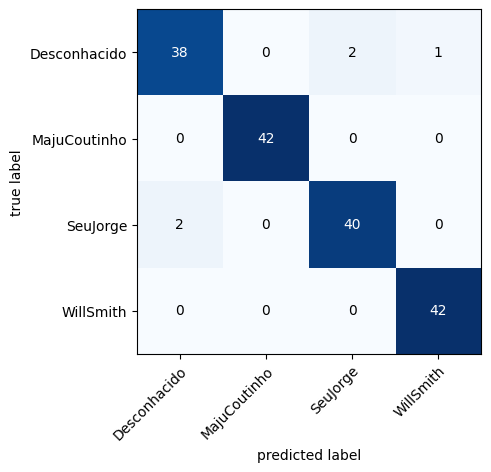

In [16]:
plot_confusion_matrix('KERAS', valY, yhat_val, nome_classes)

In [18]:
modelo.save('..\\modelos\\modelo_faces.keras')